In [7]:
import pandas as pd
import eurostat

In [8]:
df = eurostat.get_data_df(code="PRC_HICP_MANR", filter_pars={
                          "geo": "fr", "coicop": ["FOOD", "NRG", "SERV", "IGD", "CP00"]})
df = df.rename(columns={'geo\TIME_PERIOD': 'geo'})

In [9]:
df = df.drop(['freq', 'unit', 'geo'], axis=1)

In [10]:
df = df.melt(id_vars=['coicop'], var_name='TIME_PERIOD',
             value_name='OBS_VALUE')

In [11]:
import matplotlib.pyplot as plt

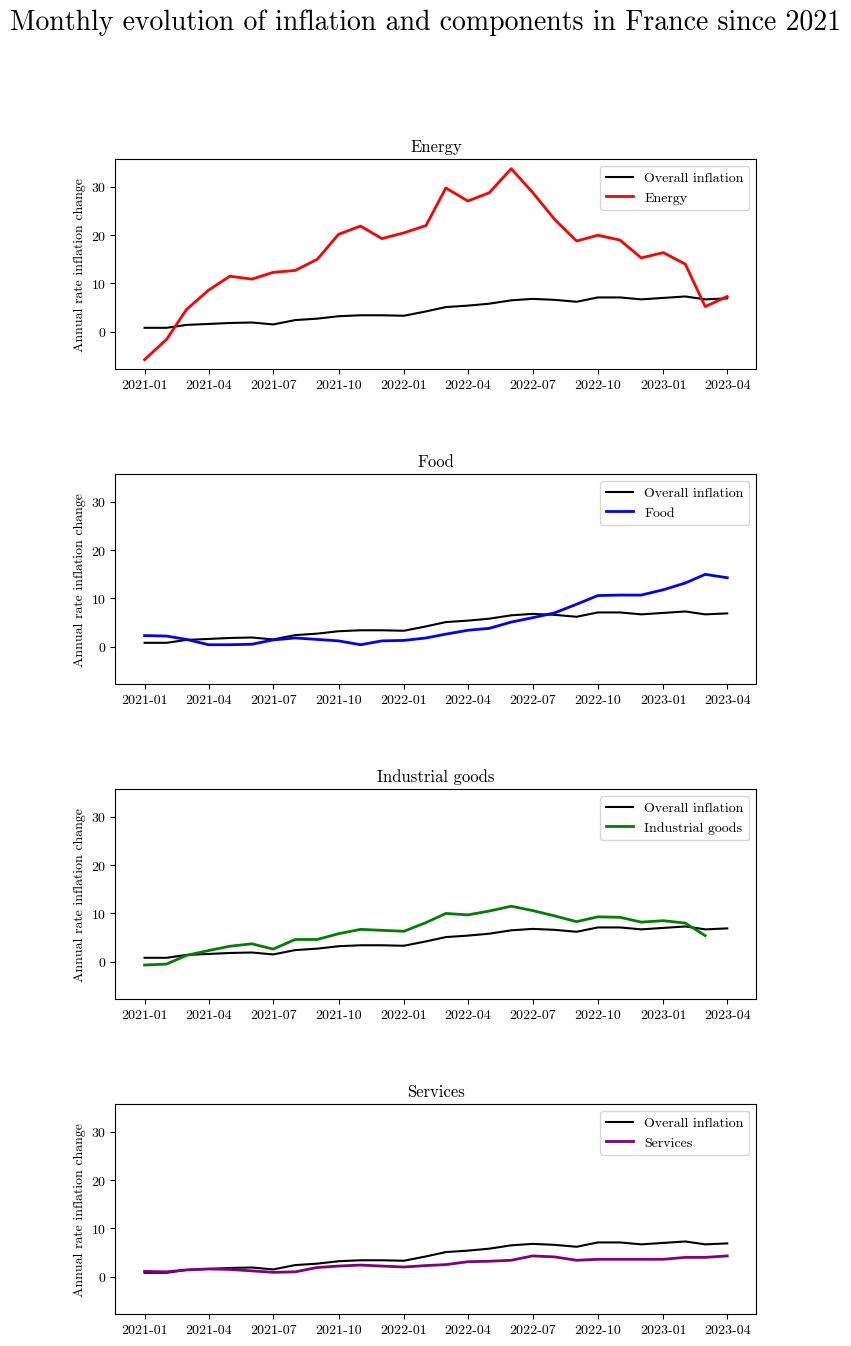

In [12]:

# Convert the "TIME_PERIOD" column to a datetime object
df["TIME_PERIOD"] = pd.to_datetime(df["TIME_PERIOD"])

# Define the components of inflation, corresponding full names, and colors
components = {"NRG": "Energy", "FOOD": "Food",
              "IGD": "Industrial goods", "SERV": "Services"}
colors = {"Energy": "red", "Food": "blue",
          "Industrial goods": "green", "Services": "purple"}

# Filter the DataFrame to values after February 2021
df = df.loc[df["TIME_PERIOD"] >= "2021-01"]

# Define the overall inflation df
df_overall = df[df["coicop"] == "CP00"]

# Create a figure with 4 subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8.27, 15), sharey=True)

# Iterate over the subplots and plot the lines for each component of inflation
for ax, component in zip(axs.flat, components):
    # Filter the rows where the value in the "coicop" column is equal to the component
    df_component = df[df["coicop"] == component]

    # Plot a line for the overall inflation and a line for the component
    ax.plot(df_overall["TIME_PERIOD"], df_overall["OBS_VALUE"],
            color="black", label="Overall inflation")
    ax.plot(df_component[df_component["coicop"] != "CP00"]["TIME_PERIOD"], df_component[df_component["coicop"]
            != "CP00"]["OBS_VALUE"], color=colors[components[component]], linewidth=2, label=components[component])

    # Add a title for the subplot
    ax.set_title(components[component])

    # Add a label for the y-axis
    ax.set_ylabel("Annual rate inflation change")

    # Add a legend for the subplot
    ax.legend()

# Add a title for the entire figure
fig.suptitle("Monthly evolution of inflation and components in France since 2021", fontsize=20)
fig.subplots_adjust(hspace=0.5)


plt.rcParams['font.family'] = 'cmr10'
plt.savefig('saved_figs/figure2.png', dpi=500, bbox_inches='tight')

# Show the figure
plt.show()